## Sophia Whitaker 
### Data Information:
#### - Observed monthly mean precipitation data over the India region from 1901-2019 in units of mm/day
#### - NetCDF format found on the COLA servers

##### Assignment 1a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
file='/homes/swhitak9/clim680data/monthly_precip_India_total.nc'

In [3]:
ds=xr.open_dataset(file, decode_times=False)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 1428)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.425e+03 1.426e+03 1.427e+03
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

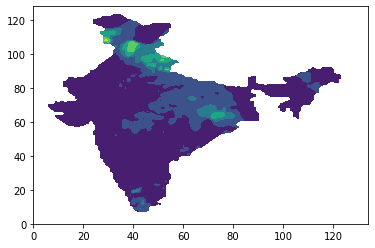

In [5]:
plt.contourf(ds['pr'][0,:,:])

In [6]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point  
import cartopy.mpl.ticker as cticker

Text(0.5, 1.0, 'Precipitation over India 1901-2019')

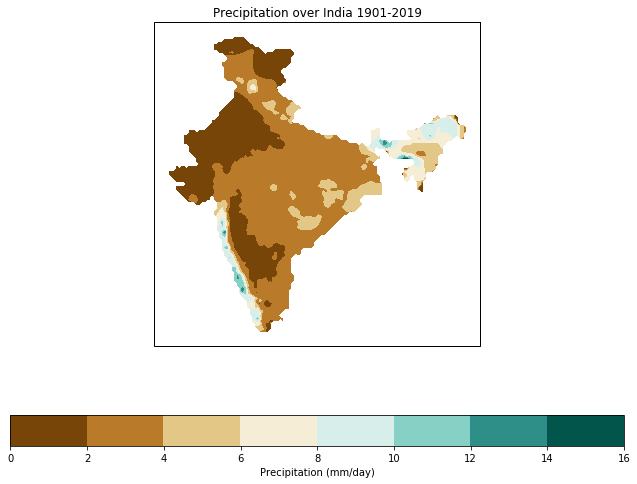

In [16]:
ds_mean=ds.mean(dim='time')

fig=plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.Orthographic())

data=ds_mean['pr']
data,lon=add_cyclic_point(data,coord=ds_mean['lon'])

cs=ax.contourf(lon,ds_mean['lat'],data,transform=ccrs.Orthographic(),cmap='BrBG')
                          
                          

ax.coastlines()
                          
                          
                          
                
cbar=plt.colorbar(cs,orientation='horizontal',label='Precipitation (mm/day)')                          

                          
                          
                          
plt.title('Precipitation over India 1901-2019')

